#1. Use regression techniques—including linear regression, ridge and lasso regularization, decision tree regression, ensemble methods (e.g., random forest), Support Vector Regression (SVR) and KNN. Estimate:
#1.Identify which factors significantly impact tip amounts.
#2.Prediction Accuracy: Build and evaluate models to forecast tips effectively.
#3.Insights for Management: Provide actionable insights to improve customer service strategies and revenue management.

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [8]:
data = pd.read_csv("tips (data for regression problem).csv")

In [10]:
data_encoded = pd.get_dummies(data, columns=["sex", "smoker", "day", "time"], drop_first=True)

In [12]:
X = data_encoded.drop(columns=['tip'])
y = data_encoded['tip']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

In [20]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results[name] = {"MSE": mse, "R^2": r2}
    print(f"{name} - MSE: {mse:.3f}, R^2: {r2:.3f}")

Linear Regression - MSE: 0.703, R^2: 0.437
Ridge Regression - MSE: 0.702, R^2: 0.438
Lasso Regression - MSE: 1.449, R^2: -0.159
Decision Tree - MSE: 1.419, R^2: -0.135
Random Forest - MSE: 0.913, R^2: 0.270
Support Vector Regressor - MSE: 0.775, R^2: 0.380
K-Nearest Neighbors - MSE: 0.903, R^2: 0.278


In [22]:
print("\nModel Performance Summary:")
for name, metrics in results.items():
    print(f"{name} - MSE: {metrics['MSE']:.3f}, R^2: {metrics['R^2']:.3f}")


Model Performance Summary:
Linear Regression - MSE: 0.703, R^2: 0.437
Ridge Regression - MSE: 0.702, R^2: 0.438
Lasso Regression - MSE: 1.449, R^2: -0.159
Decision Tree - MSE: 1.419, R^2: -0.135
Random Forest - MSE: 0.913, R^2: 0.270
Support Vector Regressor - MSE: 0.775, R^2: 0.380
K-Nearest Neighbors - MSE: 0.903, R^2: 0.278


In [24]:
print("\nFeature Importance for Linear Models:")
if "Linear Regression" in models:
    print("Linear Regression Coefficients:")
    linear_coef = pd.Series(models["Linear Regression"].coef_, index=X.columns)
    print(linear_coef.sort_values(ascending=False))



Feature Importance for Linear Models:
Linear Regression Coefficients:
total_bill    0.828432
size          0.219073
time_Lunch    0.042245
sex_Male      0.013734
day_Sun      -0.023550
day_Thur     -0.076868
day_Sat      -0.089121
smoker_Yes   -0.093581
dtype: float64


In [26]:
if "Lasso Regression" in models:
    print("\nLasso Regression Coefficients:")
    lasso_coef = pd.Series(models["Lasso Regression"].coef_, index=X.columns)
    print(lasso_coef.sort_values(ascending=False))


Lasso Regression Coefficients:
total_bill    0.0
size          0.0
sex_Male      0.0
smoker_Yes   -0.0
day_Sat       0.0
day_Sun       0.0
day_Thur     -0.0
time_Lunch   -0.0
dtype: float64


In [28]:
print("\nFeature Importance for Tree-Based Models:")
if "Random Forest" in models:
    print("Random Forest Feature Importances:")
    rf_importances = pd.Series(models["Random Forest"].feature_importances_, index=X.columns)
    print(rf_importances.sort_values(ascending=False))


Feature Importance for Tree-Based Models:
Random Forest Feature Importances:
total_bill    0.777083
smoker_Yes    0.062869
size          0.060243
day_Sat       0.029959
day_Sun       0.024196
sex_Male      0.023166
day_Thur      0.013120
time_Lunch    0.009364
dtype: float64


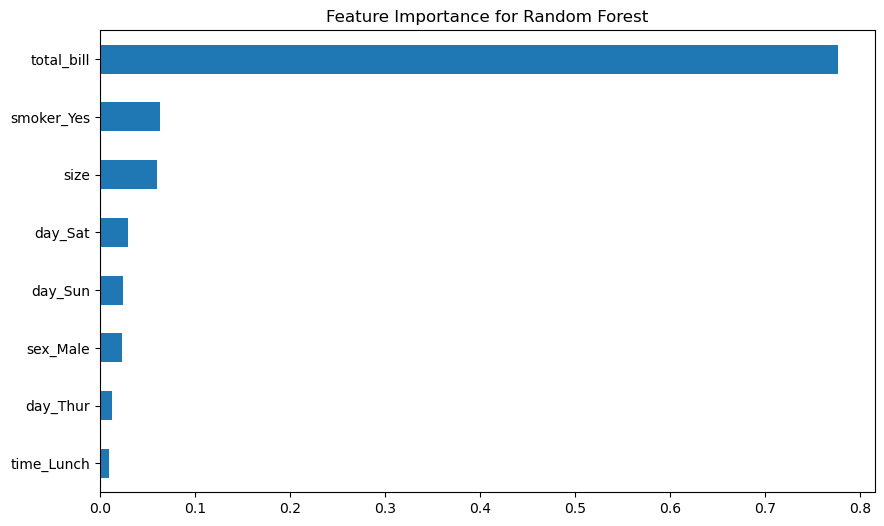

In [30]:
plt.figure(figsize=(10, 6))
rf_importances.sort_values(ascending=True).plot(kind='barh')
plt.title("Feature Importance for Random Forest")
plt.show()

#2. Check if the data follows a linear trend using following methods to analyze the relationship between the target variable and predictors.
#•Scatter Plot
#•Pair Plot for Multiple Features
#•Correlation Matrix (Heatmap)
#•Statistical Tests for Linearity (Rainbow Test)
#•Residuals Plot
#•Line Plot (for time-series data)
#•Based on the trend in data apply suitable regression method and check model prediction accuracy.

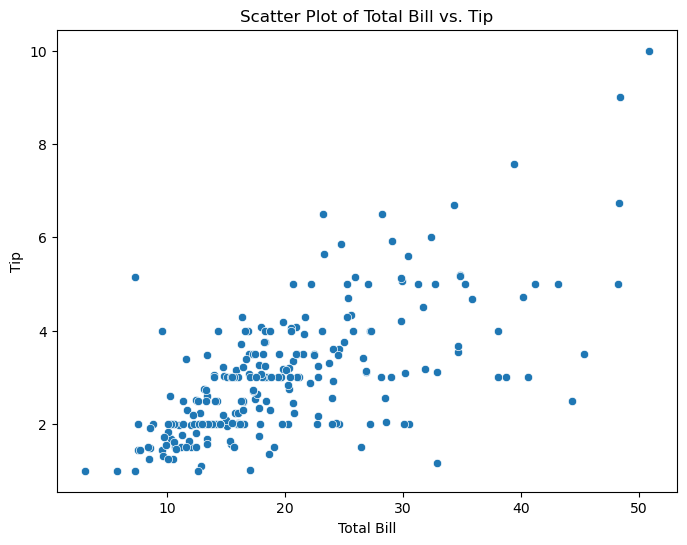

In [33]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="total_bill", y="tip", data=data)
plt.title("Scatter Plot of Total Bill vs. Tip")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()


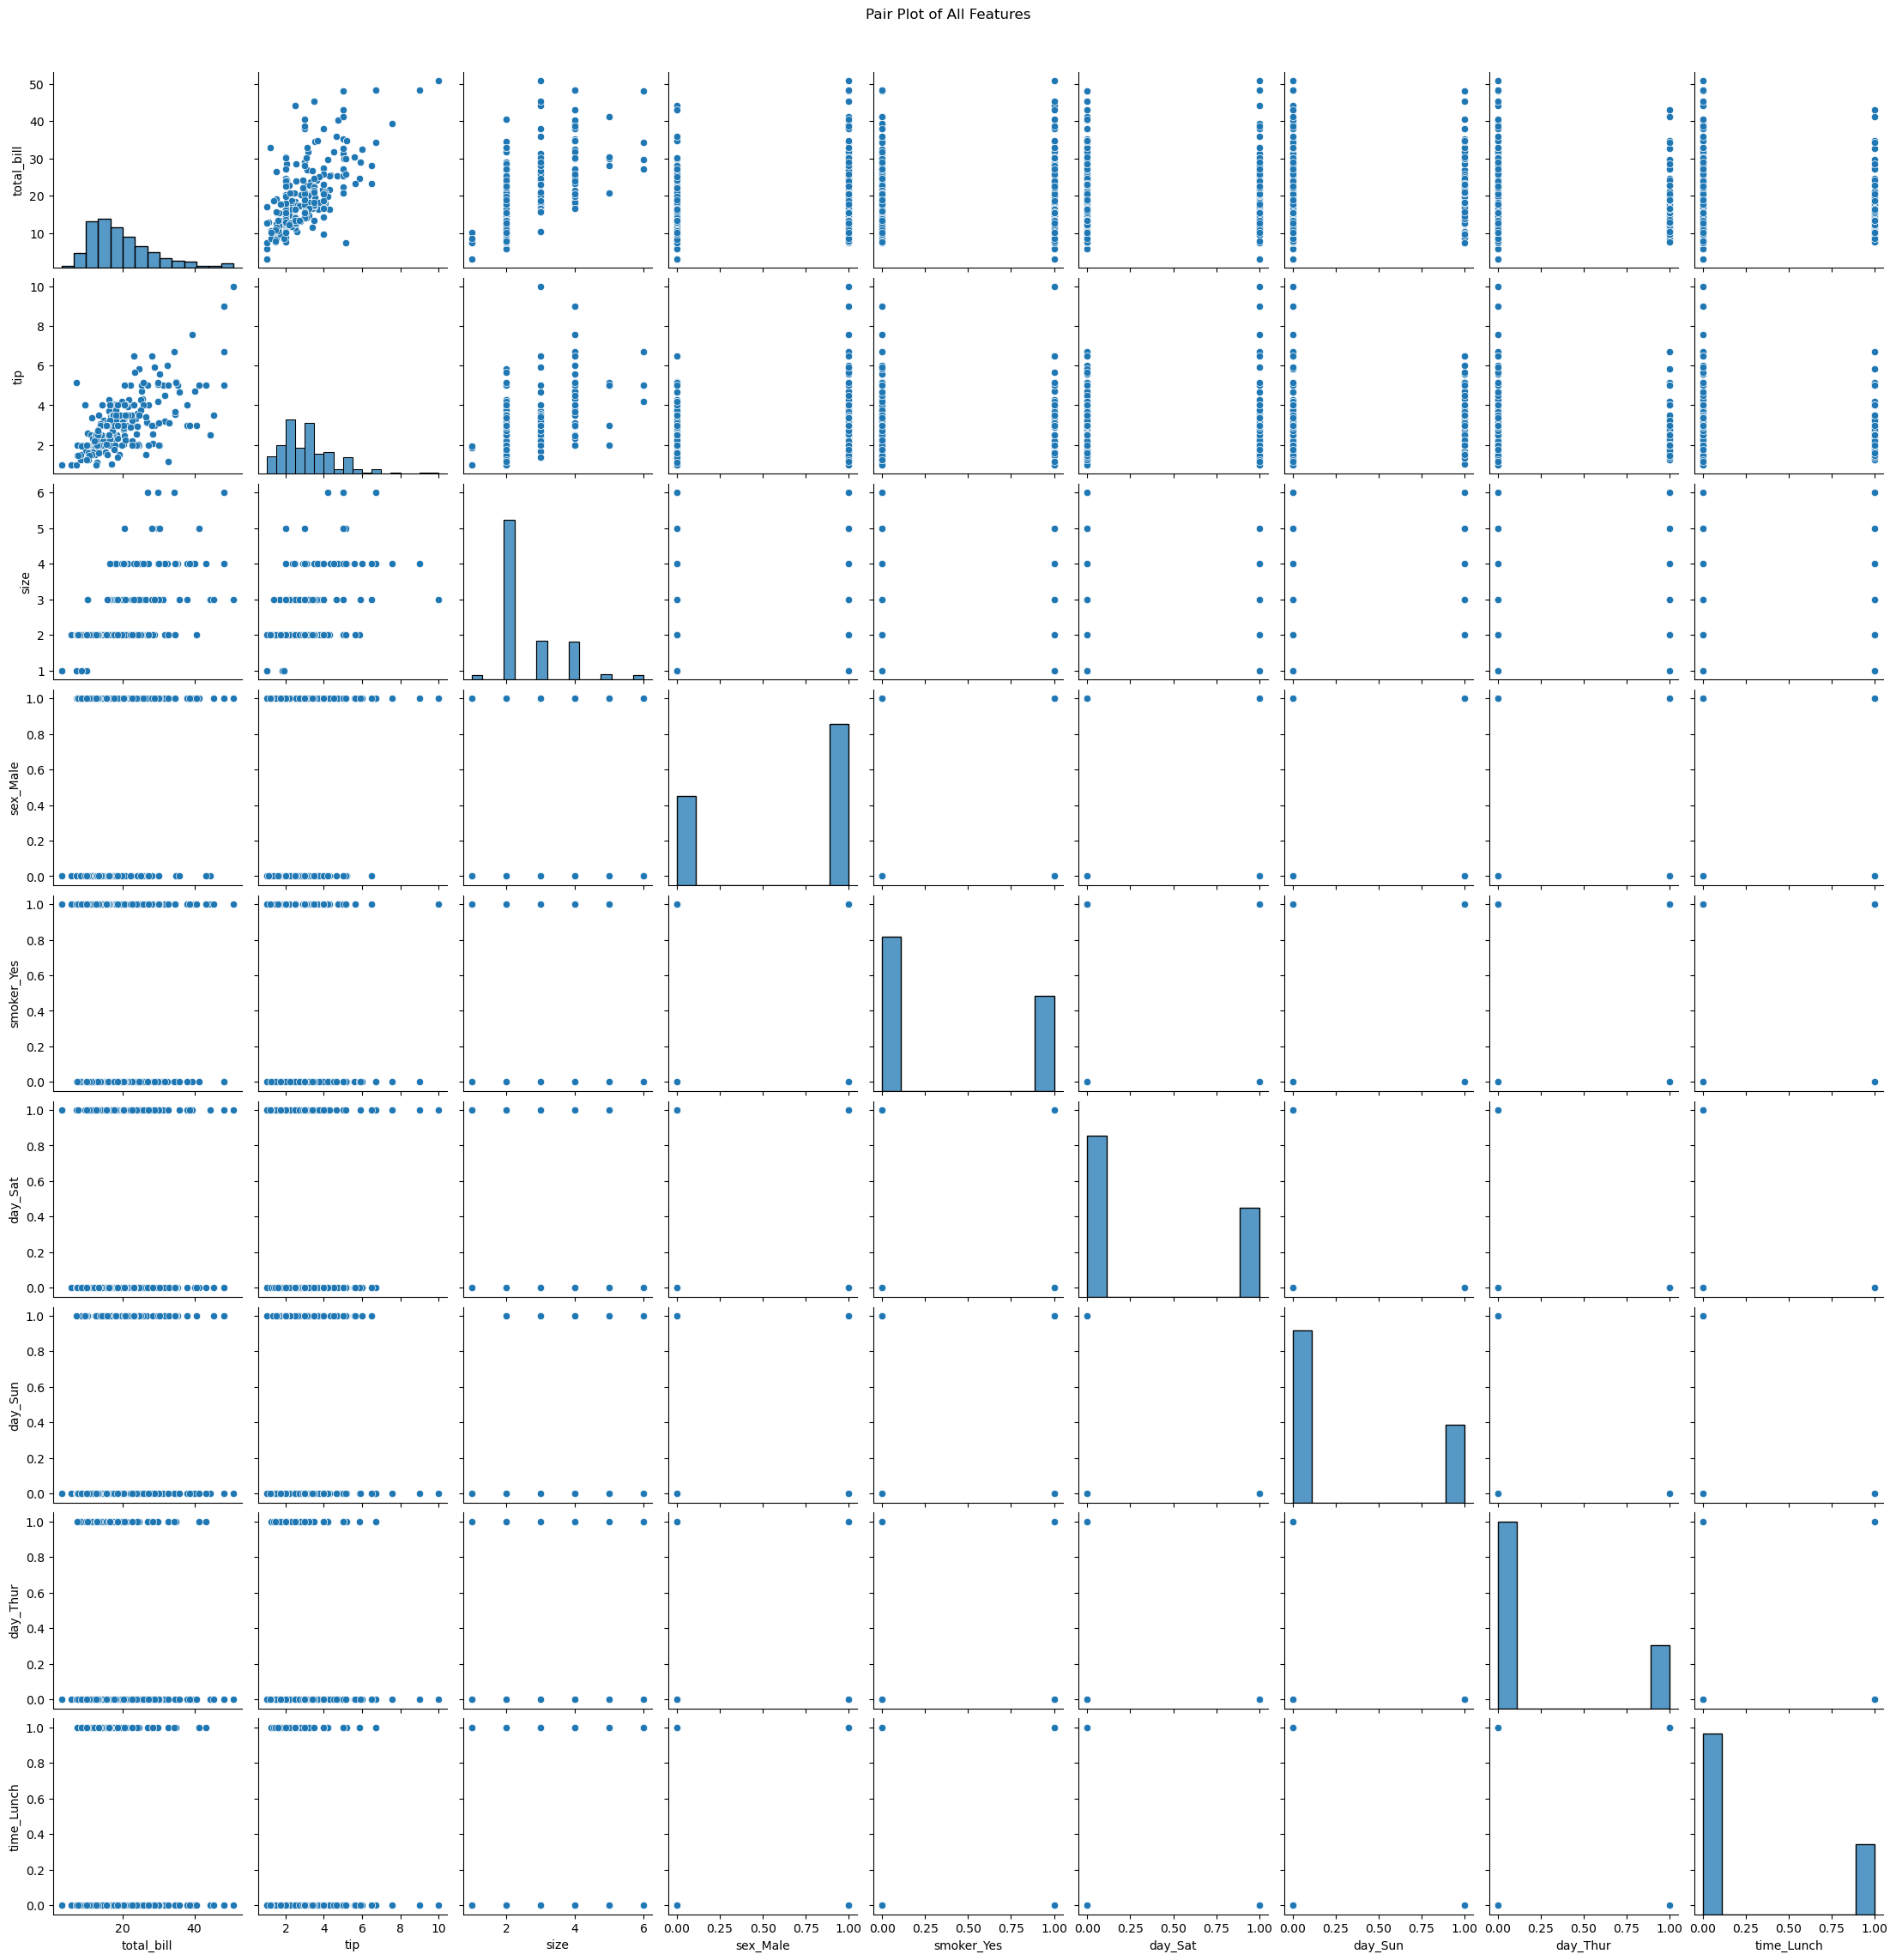

In [39]:
sns.pairplot(data_encoded)
plt.suptitle("Pair Plot of All Features", y=1.02)
plt.show()

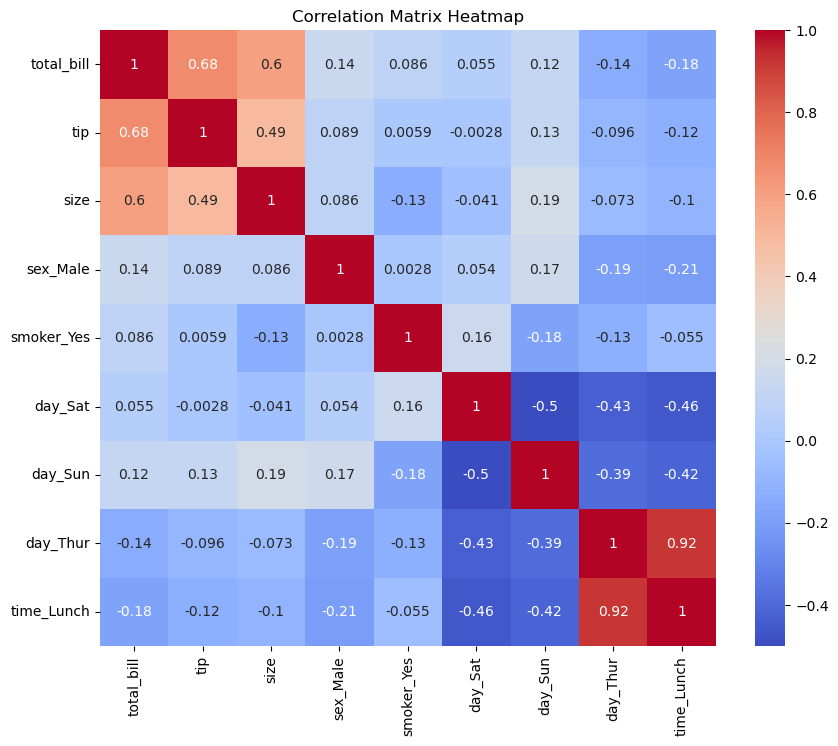

In [40]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_encoded.corr(), annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [81]:
import pandas as pd
import numpy as np
from statsmodels.api import OLS, add_constant
from statsmodels.stats.diagnostic import linear_rainbow

X_total_bill = add_constant(data_encoded['total_bill'])
y_tip = data_encoded['tip']
linear_model = OLS(y_tip, X_total_bill).fit()
rainbow_stat, rainbow_p_value = linear_rainbow(linear_model)

print("Rainbow Test Statistic:", rainbow_stat)
print("Rainbow Test p-value:", rainbow_p_value)


Rainbow Test Statistic: 1.2291480226129023
Rainbow Test p-value: 0.1291192152551388


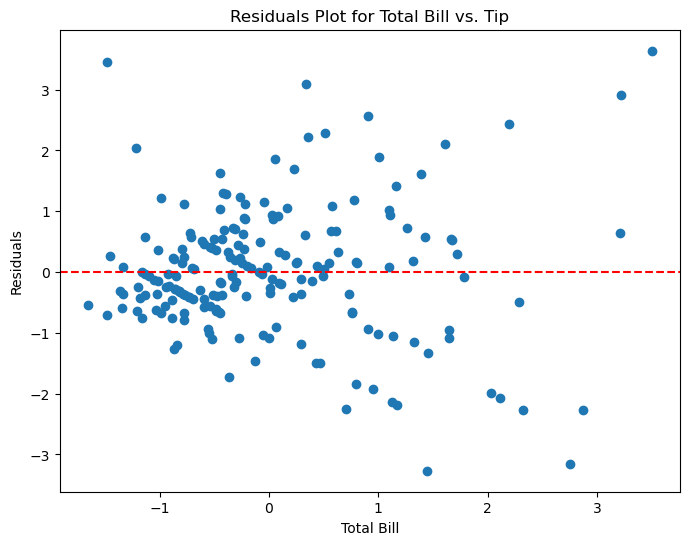

In [83]:
model = LinearRegression()
model.fit(X_train[:, 0].reshape(-1, 1), y_train)  # Reshape to a 2D array for the model
predictions = model.predict(X_train[:, 0].reshape(-1, 1))

residuals = y_train - predictions

plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], residuals)  # Plot the residuals against the 'total_bill' values
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Total Bill")
plt.ylabel("Residuals")
plt.title("Residuals Plot for Total Bill vs. Tip")
plt.show()

In [85]:
final_model = LinearRegression()
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model - MSE:", mse)
print("Linear Regression Model - R^2:", r2)

Linear Regression Model - MSE: 0.7033566017436103
Linear Regression Model - R^2: 0.43730181943482516
